In [31]:
pip install wordcloud

In [51]:
import pandas as pd 
import numpy as np 
import tensorflow as tf
from keras.models import Sequential
import keras
from sklearn.model_selection import train_test_split
from keras.layers import Dense, SimpleRNN, Embedding,Dropout
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [52]:
df = pd.read_csv(r"E:\Data\email spam\spam.csv")

In [53]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [54]:
df['Category']= df['Category'].apply(lambda x: 1 if x=='ham' else 0)

In [55]:
df.head()

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [56]:
df.sum().isna()

Category    False
Message     False
dtype: bool

In [57]:
df['Category'].value_counts()

Category
1    4825
0     747
Name: count, dtype: int64

In [58]:
tfidf_vectorizer = TfidfVectorizer(max_features=100, stop_words='english')  # Limiting features to 5000

# Vectorize the text
X_tfidf = tfidf_vectorizer.fit_transform(df['Message'])
X_tfidf.shape

(5572, 100)

In [59]:
 X_tfidf = X_tfidf.toarray()

In [60]:
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(
    X_tfidf, df['Category'], test_size=0.2, random_state=42, stratify=df['Category']
)

In [61]:
train_dist = y_train_tfidf.value_counts(normalize=True)
test_dist = y_test_tfidf.value_counts(normalize=True)

In [62]:
train_dist

Category
1    0.865829
0    0.134171
Name: proportion, dtype: float64

In [63]:
X_test_tfidf.shape

(1115, 100)

In [64]:
print(type(X_test_tfidf))  # Should be <class 'numpy.ndarray'>
print(type(y_test_tfidf))  # Should be <class 'numpy.ndarray'> or <class 'list'>


<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


In [65]:
model_tfidf = Sequential([
    Dense(64, input_shape=(100,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

E:\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [66]:
model_tfidf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [67]:
history_tfidf = model_tfidf.fit(
    X_train_tfidf, y_train_tfidf,
    epochs=50,
    batch_size=32,
    validation_data=(X_test_tfidf, y_test_tfidf)
)

Epoch 1/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8193 - loss: 0.5076 - val_accuracy: 0.9058 - val_loss: 0.2306
Epoch 2/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9432 - loss: 0.1702 - val_accuracy: 0.9453 - val_loss: 0.1530
Epoch 3/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9630 - loss: 0.1069 - val_accuracy: 0.9534 - val_loss: 0.1531
Epoch 4/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9686 - loss: 0.0998 - val_accuracy: 0.9561 - val_loss: 0.1475
Epoch 5/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9693 - loss: 0.0967 - val_accuracy: 0.9561 - val_loss: 0.1504
Epoch 6/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9694 - loss: 0.1019 - val_accuracy: 0.9516 - val_loss: 0.1462
Epoch 7/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9732 - loss: 0.0826 - val_accuracy: 0.9552 - val_loss: 0.1505
Epoch 8/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9790 - loss: 0.0798 - val_accuracy: 0.

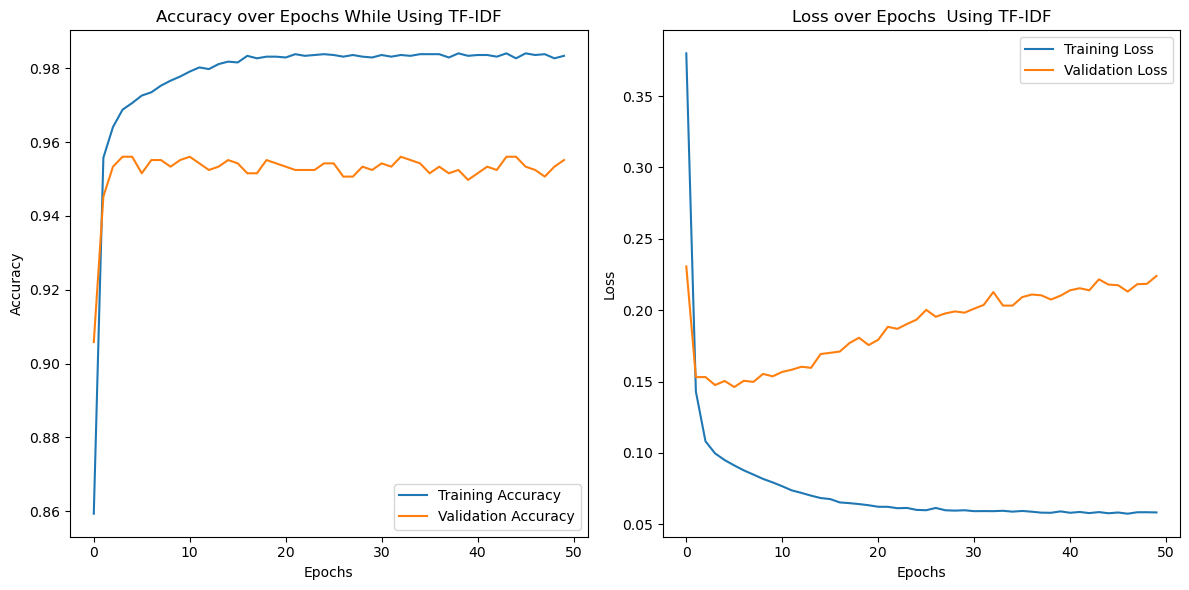

In [68]:
history_dict_tfidf = history_tfidf.history

# Plot accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_dict_tfidf['accuracy'], label='Training Accuracy')
plt.plot(history_dict_tfidf['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs While Using TF-IDF')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_dict_tfidf['loss'], label='Training Loss')
plt.plot(history_dict_tfidf['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs  Using TF-IDF')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [69]:
y_pred_tf_idf = (model_tfidf.predict(X_test_tfidf)>0.5).astype('int32')
y_pred_tf_idf

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [70]:
cm_tfidf = confusion_matrix(y_test_tfidf,y_pred_tf_idf)
print("Result from TF-IDF Embedding")
print(classification_report(y_test_tfidf, y_pred_tf_idf))

Result from TF-IDF Embedding
              precision    recall  f1-score   support

           0       0.92      0.73      0.81       149
           1       0.96      0.99      0.97       966

    accuracy                           0.96      1115
   macro avg       0.94      0.86      0.89      1115
weighted avg       0.95      0.96      0.95      1115



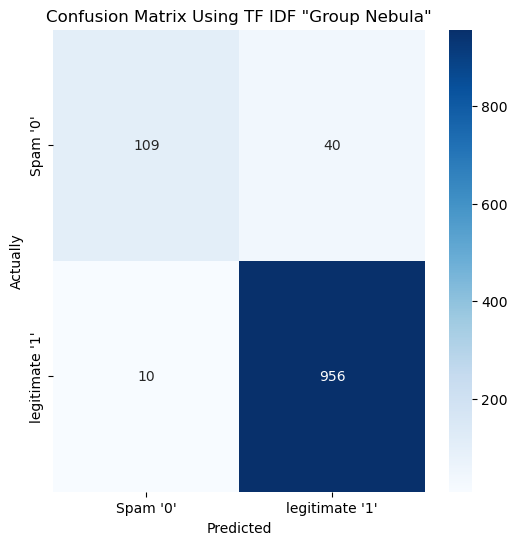

In [105]:
plt.figure(figsize=(6, 6))
sns.heatmap(cm_tfidf, annot=True, fmt='d', cmap='Blues', xticklabels=["Spam '0'", "legitimate '1'"], yticklabels=["Spam '0'", "legitimate '1'"])
plt.title('Confusion Matrix Using TF IDF "Group Nebula"')
plt.xlabel('Predicted')
plt.ylabel('Actually')
plt.show()

In [72]:
import gensim
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kshtz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [73]:
df['Tokenized_Message'] = df['Message'].apply(lambda x: word_tokenize(x.lower()))

# Step 2: Train Word2Vec Model
model_w2v = gensim.models.Word2Vec(sentences=df['Tokenized_Message'], vector_size=100, window=5, min_count=1, workers=4)


In [74]:
# Step 3: Convert text to Word2Vec vectors (averaging word vectors for each sentence)
def sentence_to_vec(sentence, model_w2v, vector_size=100):
    words = sentence
    word_vecs = []
    
    for word in words:
        if word in model_w2v.wv:
            word_vecs.append(model_w2v.wv[word])
    
    if word_vecs:
        return np.mean(word_vecs, axis=0)
    else:
        return np.zeros(vector_size)  # Return zero vector if no word found


In [75]:
X_w2v = np.array([sentence_to_vec(sentence, model_w2v) for sentence in df['Tokenized_Message']])
y_w2v = df['Category'].values

In [76]:
X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v = train_test_split(
    X_w2v, y_w2v, test_size=0.2, random_state=42, stratify=y_w2v
)

In [77]:
model_w2v = Sequential([
    Dense(64, input_shape=(100,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

E:\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [78]:
model_w2v.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [79]:
history_w2v = model_w2v.fit(
    X_train_w2v, y_train_w2v,
    epochs=100,
    batch_size=32,
    validation_data=(X_test_w2v, y_test_w2v)
)

Epoch 1/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8366 - loss: 0.4021 - val_accuracy: 0.8664 - val_loss: 0.3127
Epoch 2/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8668 - loss: 0.2952 - val_accuracy: 0.8717 - val_loss: 0.2753
Epoch 3/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8879 - loss: 0.2689 - val_accuracy: 0.9022 - val_loss: 0.2488
Epoch 4/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9114 - loss: 0.2280 - val_accuracy: 0.9067 - val_loss: 0.2330
Epoch 5/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9105 - loss: 0.2188 - val_accuracy: 0.8951 - val_loss: 0.2381
Epoch 6/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9133 - loss: 0.2078 - val_accuracy: 0.9238 - val_loss: 0.2033
Epoch 7/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9207 - loss: 0.2060 - val_accuracy: 0.9265 - val_loss: 0.1945
Epoch 8/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9369 - loss: 0.1800 - val_accu

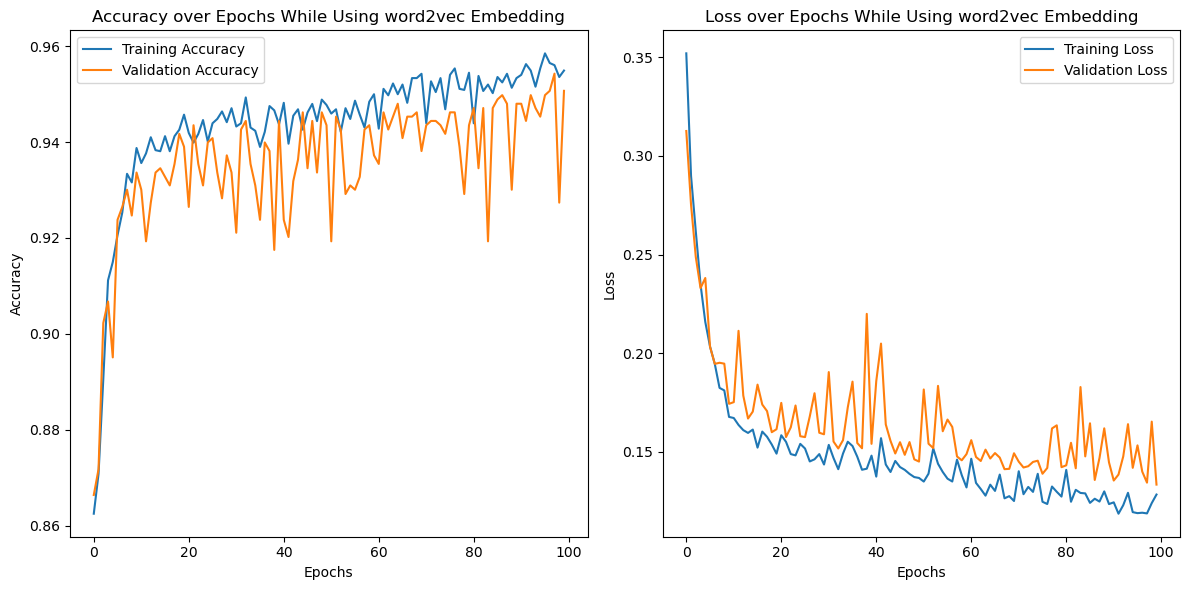

In [106]:
history_dict_w2v = history_w2v.history

# Plot accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_dict_w2v['accuracy'], label='Training Accuracy')
plt.plot(history_dict_w2v['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs While Using word2vec Embedding')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_dict_w2v['loss'], label='Training Loss')
plt.plot(history_dict_w2v['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs While Using word2vec Embedding')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [81]:
y_pred_w2v = (model_w2v.predict(X_test_w2v)>0.5).astype('int32')


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [109]:
print("Result from word2vec Embedding")
print(classification_report(y_test_w2v, y_pred_w2v))

Result from word2vec Embedding
              precision    recall  f1-score   support

           0       0.86      0.76      0.80       149
           1       0.96      0.98      0.97       966

    accuracy                           0.95      1115
   macro avg       0.91      0.87      0.89      1115
weighted avg       0.95      0.95      0.95      1115



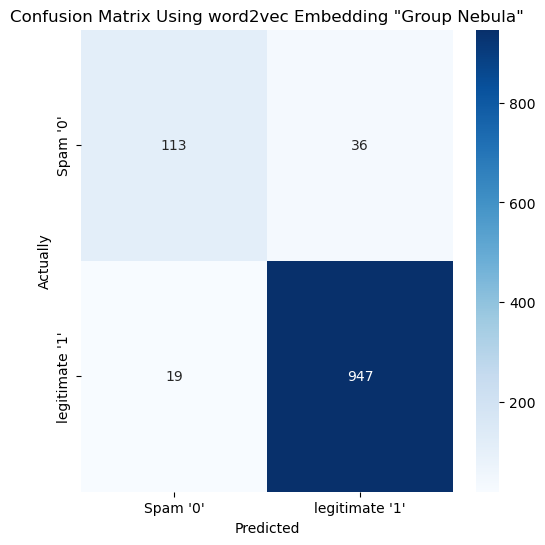

In [107]:
cm_w2v = confusion_matrix(y_test_w2v, y_pred_w2v)
plt.figure(figsize=(6, 6))
sns.heatmap(cm_w2v, annot=True, fmt='d', cmap='Blues', xticklabels=["Spam '0'", "legitimate '1'"], yticklabels=["Spam '0'", "legitimate '1'"])
plt.title('Confusion Matrix Using word2vec Embedding "Group Nebula"')
plt.xlabel('Predicted')
plt.ylabel('Actually')
plt.show()

In [84]:
glove_path = r"E:\code\algorithms\glove.6B\glove.6B.200d.txt"

In [85]:
def load_glove_model(glove_file_path):
    glove_model = {}
    with open(glove_file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            glove_model[word] = vector
    print(f"Loaded {len(glove_model)} word vectors from GloVe.")
    return glove_model


In [86]:
glove_model = load_glove_model(glove_path)

Loaded 400000 word vectors from GloVe.


In [87]:
import chardet
with open(glove_path, 'rb') as f:
    rawdata = f.read(10000)
    result = chardet.detect(rawdata)
    print(result)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [88]:
df.head()

,Category,Message,Tokenized_Message
0,1,"Go until jurong point, crazy.. Available only ...","[go, until, jurong, point, ,, crazy, .., avail..."
1,1,Ok lar... Joking wif u oni...,"[ok, lar, ..., joking, wif, u, oni, ...]"
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,1,U dun say so early hor... U c already then say...,"[u, dun, say, so, early, hor, ..., u, c, alrea..."
4,1,"Nah I don't think he goes to usf, he lives aro...","[nah, i, do, n't, think, he, goes, to, usf, ,,..."


In [91]:
def sentence_to_vec(sentence, glove_model, embedding_dim=200):
    # Compute the mean of word vectors for a sentence
    vectors = [glove_model[word] for word in sentence if word in glove_model]
    if len(vectors) == 0:
        return np.zeros(embedding_dim)  # If no word matches, return a zero vector
    return np.mean(vectors, axis=0)

# # Apply to the dataframe
df['Sentence_Embedding'] = df['Tokenized_Message'].apply(
    lambda sentence: sentence_to_vec(sentence, glove_model, embedding_dim=50)
)
df['embedding_length'] = df['Sentence_Embedding'].apply(lambda x: len(x))

In [92]:
print(df['embedding_length'].value_counts())

embedding_length
200    5567
50        5
Name: count, dtype: int64


In [93]:
def pad_embedding(embedding, target_length=200):
    return np.pad(embedding, (0, target_length - len(embedding)), mode='constant')
df['Sentence_Embedding'] = df['Sentence_Embedding'].apply(lambda x: pad_embedding(x, target_length=200))

In [94]:

# Convert to NumPy arrays
X_glove = np.array(df['Sentence_Embedding'].tolist())
y_glove = df['Category'].values  # Ensure your labels are numerical (e.g., 0 and 1)


X_train_glove, X_test_glove, y_train_glove, y_test_glove = train_test_split(X_glove, y_glove, test_size=0.2, random_state=42,stratify=y_glove
                            
    )


In [95]:
model_glove = Sequential([
    Dense(128, activation='relu', input_shape=(200,)),  # Input dimension = GloVe dimension
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

E:\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [96]:
model_glove.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [97]:
history_glove = model_glove.fit(X_train_glove, y_train_glove, epochs=100, batch_size=32, validation_data=(X_test_glove, y_test_glove))

Epoch 1/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8445 - loss: 0.3837 - val_accuracy: 0.9471 - val_loss: 0.1728
Epoch 2/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9470 - loss: 0.1608 - val_accuracy: 0.9507 - val_loss: 0.1390
Epoch 3/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9613 - loss: 0.1329 - val_accuracy: 0.9507 - val_loss: 0.1263
Epoch 4/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9611 - loss: 0.1179 - val_accuracy: 0.9570 - val_loss: 0.1193
Epoch 5/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9674 - loss: 0.0978 - val_accuracy: 0.9587 - val_loss: 0.1077
Epoch 6/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9730 - loss: 0.0908 - val_accuracy: 0.9632 - val_loss: 0.0983
Epoch 7/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9709 - loss: 0.0888 - val_accuracy: 0.9641 - val_loss: 0.1018
Epoch 8/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9771 - loss: 0.0756 - val_accu

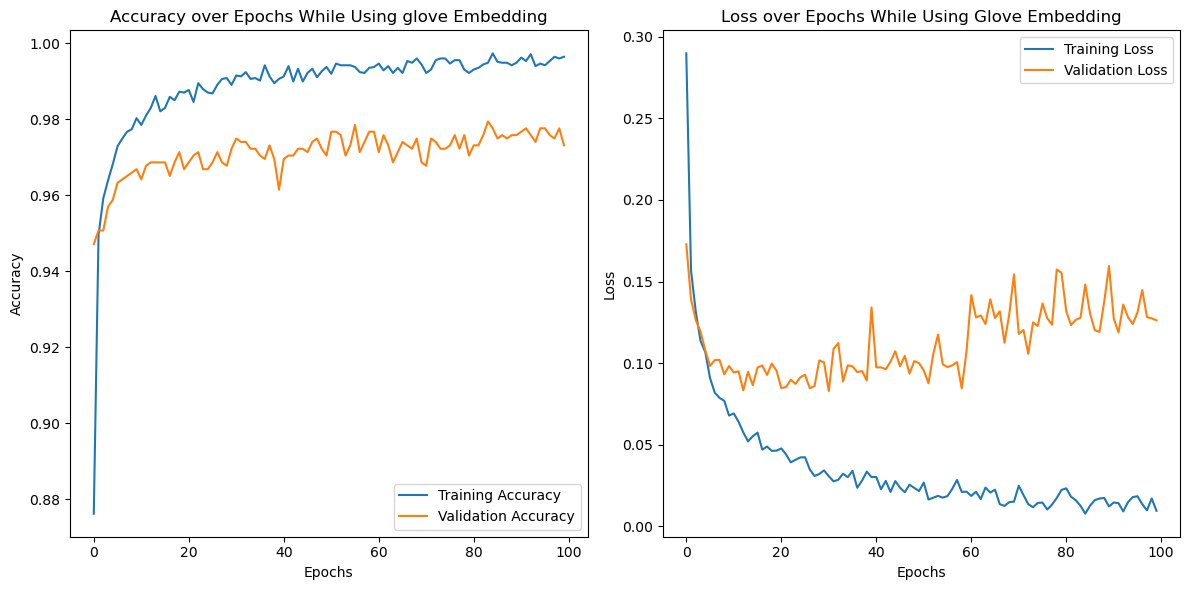

In [98]:
history_dict_glove = history_glove.history

# Plot accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_dict_glove['accuracy'], label='Training Accuracy')
plt.plot(history_dict_glove['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs While Using glove Embedding')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_dict_glove['loss'], label='Training Loss')
plt.plot(history_dict_glove['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs While Using Glove Embedding')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [99]:
y_pred_globe = (model_glove.predict(X_test_glove) > 0.5).astype("int32")  # Convert probabilities to binary
cm_glove = confusion_matrix(y_test_glove, y_pred_globe)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [100]:
print("Result from glove Embedding")
print(classification_report(y_test_glove, y_pred_globe))

Result from glove Embedding
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       149
           1       0.98      0.98      0.98       966

    accuracy                           0.97      1115
   macro avg       0.94      0.94      0.94      1115
weighted avg       0.97      0.97      0.97      1115



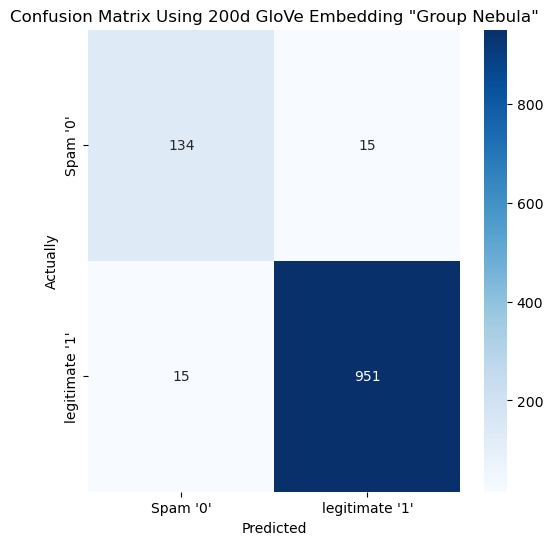

In [108]:

plt.figure(figsize=(6, 6))
sns.heatmap(cm_glove, annot=True, fmt='d', cmap='Blues', xticklabels=["Spam '0'", "legitimate '1'"], yticklabels=["Spam '0'", "legitimate '1'"])
plt.title('Confusion Matrix Using 200d GloVe Embedding "Group Nebula"')
plt.xlabel('Predicted')
plt.ylabel('Actually')
plt.show()